200
Page fetched successfully
Number of movies found: 25
   Rank                      Title  Year  Rating
0     1   The Shawshank Redemption  1994     9.3
1     2              The Godfather  1972     9.2
2     3            The Dark Knight  2008     9.0
3     4      The Godfather Part II  1974     9.0
4     5               12 Angry Men  1957     9.0
   Rank                                              Title  Year  Rating
0     1                           The Shawshank Redemption  1994     9.3
1     2                                      The Godfather  1972     9.2
2     3                                    The Dark Knight  2008     9.0
3     4                              The Godfather Part II  1974     9.0
4     5                                       12 Angry Men  1957     9.0
5     6                                   Schindler's List  1993     9.0
6     7      The Lord of the Rings: The Return of the King  2003     9.0
7     8                                       Pulp Fiction  1994 

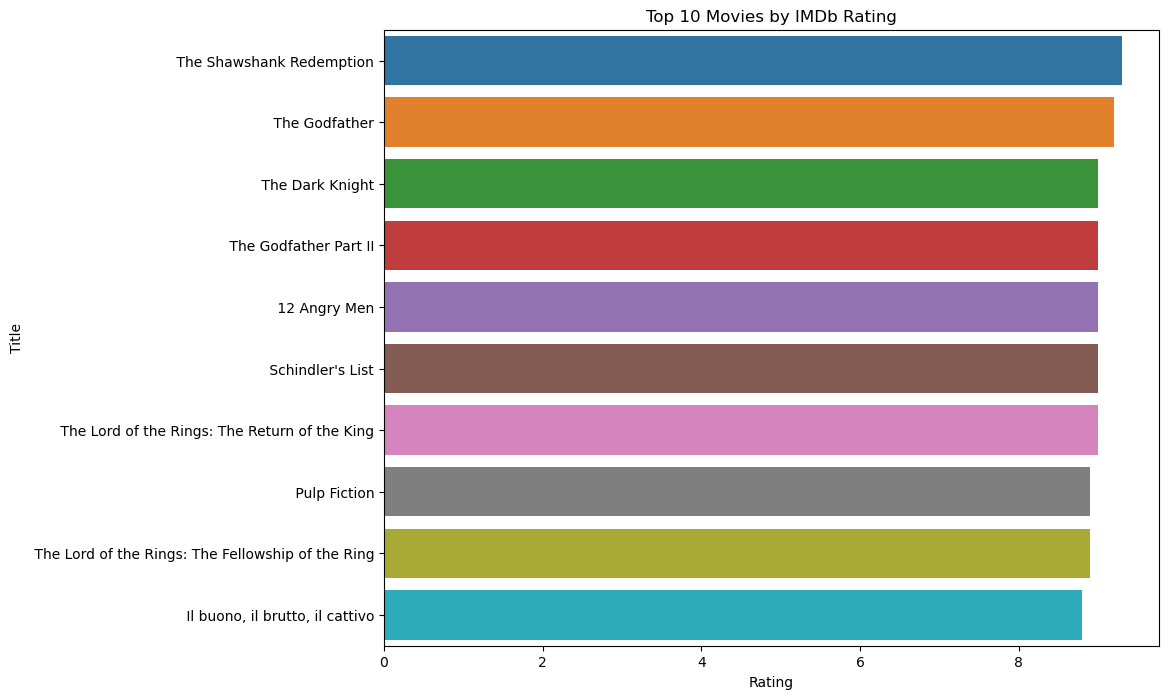

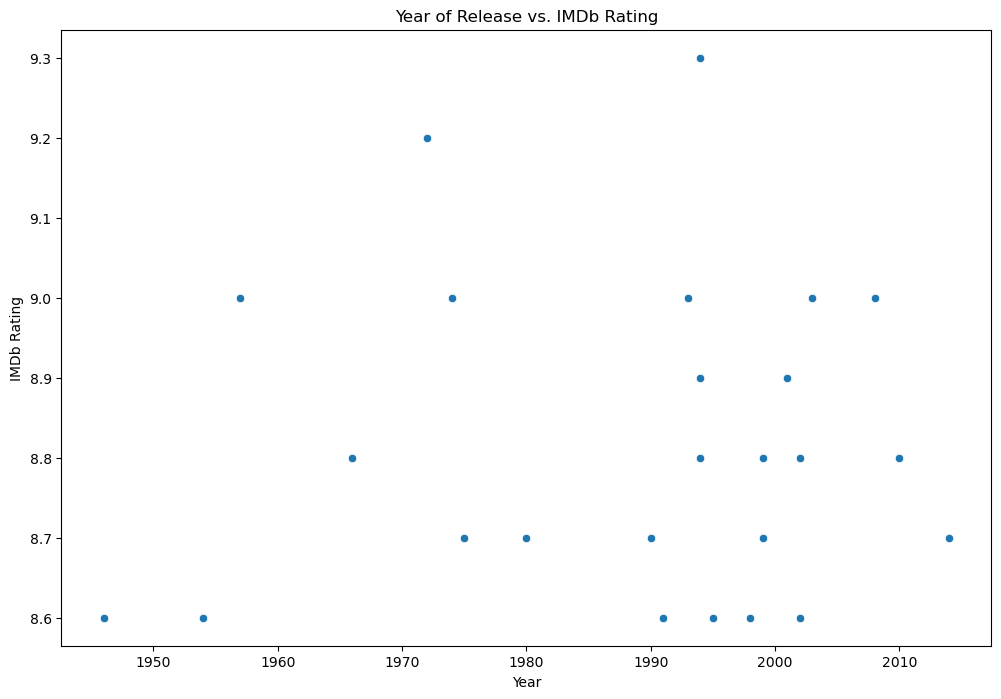

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


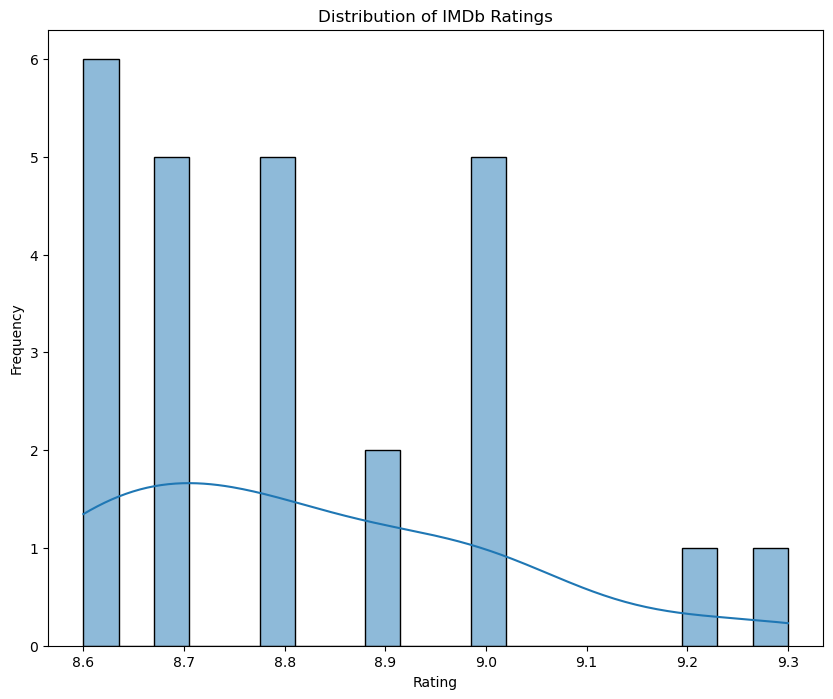

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Web scraping
url = "https://www.imdb.com/chart/top"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}
response = requests.get(url, headers=headers)

# Check the status code and content
print(response.status_code)
if response.status_code == 200:
    print("Page fetched successfully")
else:
    print("Failed to retrieve the webpage. Status code:", response.status_code)
    exit()  # Exit if webpage retrieval failed

# Parse the HTML content
soup = BeautifulSoup(response.text, 'html.parser')

# Define CSS selectors
movie_list = soup.select('li.ipc-metadata-list-summary-item')

# Print number of elements found
print(f"Number of movies found: {len(movie_list)}")


# Initialize lists to store data
ranks = []
titles = []
years = []
ratings = []

# Extract data from the selected elements
try:
    for movie_elem in movie_list:
        try:
            # Rank and title
            rank_title = movie_elem.select_one('.ipc-title-link-wrapper h3.ipc-title__text').text.strip()
            rank, title = rank_title.split('.', 1)

            # Year (if available) 
            year_element = movie_elem.select_one('.sc-b189961a-8.kLaxqf.cli-title-metadata-item')
            year = int(year_element.text.strip()) if year_element and year_element.text.strip().isdigit() else None
       
  
            
            # Rating (if available)
            #rating_element = movie_elem.select_one('.ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating')
            #rating = float(rating_element.text.strip()) if rating_element else None


            rating_element = movie_elem.select_one('.ipc-rating-star.ipc-rating-star--base.ipc-rating-star--imdb.ratingGroup--imdb-rating')
            rating = float(rating_element['aria-label'].split()[2]) if rating_element else None
            
            # Append to lists if both year and rating are available
            
            if year is not None and rating is not None:
                ranks.append(rank)
                titles.append(title)
                years.append(year)
                ratings.append(rating)
            else:  print(f"Skipping movie: {title}. Missing year or rating information.")
        except Exception as e:
            print(f"Error extracting data for movie: {e}")

    # Create a DataFrame
    df = pd.DataFrame({
        'Rank': ranks,
        'Title': titles,
        'Year': years,
        'Rating': ratings
    })

    # Clean up data types
    df['Rank'] = df['Rank'].astype(int)  # Convert Rank to integer
    df['Year'] = df['Year'].astype(int)  # Convert Year to integer
    df['Rating'] = df['Rating'].astype(float)  # Convert Rating to float

    # Display the DataFrame for debugging
    print(df.head())

    # Check if df is not empty
    if not df.empty:
        # Check the contents of top_10_movies
        top_10_movies = df.nlargest(10, 'Rating')
        
        # Print top_10_movies for debugging
        print(top_10_movies)
        
        # Plotting the bar chart for top 10 movies based on IMDb rating
        plt.figure(figsize=(10, 8))
        sns.barplot(x='Rating', y='Title', data=top_10_movies)
        plt.title('Top 10 Movies by IMDb Rating')
        plt.xlabel('Rating')
        plt.ylabel('Title')
        plt.show()
    else:
        print("Error: DataFrame 'df' is empty. Check data extraction and processing.")

    # Additional plots for exploration

    # Scatter plot for the relationship between year of release and IMDb rating
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x='Year', y='Rating', data=df)
    plt.title('Year of Release vs. IMDb Rating')
    plt.xlabel('Year')
    plt.ylabel('IMDb Rating')
    plt.show()

    # Histogram for the distribution of movie ratings
    plt.figure(figsize=(10, 8))
    sns.histplot(df['Rating'], bins=20, kde=True)
    plt.title('Distribution of IMDb Ratings')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.show()

except Exception as e:
    print(f"Error in data extraction or processing: {e}")